<div style="text-align: center;">
    <img src="mamut/utils/mamut_header.png" alt="Logo" width="700"/>
</div>

**MAMUT** is an Python library designed to extend the capabilities of `scikit-learn` and `Optuna`, focusing on the classification of tabular data. It supports both binary and multi-class classification tasks, making it an essential tool for machine learning practitioners.

#### **Features:**

- **Preprocessing Methods**: MAMUT offers a wide range of preprocessing methods with numerous parameters to choose from, including: Various imputers for missing values, Scalers, Value encoding, Skewness reduction, Outlier detection, PCA, Feature selection.

- **Supported Models**: The library takes into account several powerful models, including: `LogisticRegression`, `RandomForestClassifier`, `SVC`, `XGBClassifier`, `MLPClassifier`, `GaussianNB`, `KNeighborsClassifier`

- **Hyperparameter Optimization**: For hyperparameter optimization, MAMUT employs both Bayesian optimization and grid search, ensuring the best possible performance for each model.

- **Dynamic Ensemble Search**: MAMUT implements dynamic ensemble search, finding only the best models for ensembling with majority voting (both soft and hard).

#### **Target Audience**

AutoML library is designed for both beginners and professionals in machine learning. Beginners will benefit from the educational visualizations and easy-to-understand reports, while professionals and advanced enthusiasts will appreciate the robust performance and model interpretability. The library caters to those who seek high-quality models with a focus on explainability.

#### **Unique Features**

MAMUT distinguishes itself with its lightweight code and user-friendly interface, inspired by `PyCaret`. It incorporates well-selected and optimized ensembles, advanced explainability tools (such as `SHAP`), and detailed reports (e.g., in HTML). Additionally, MAMUT dynamically adjusts its pipeline based on the input data, providing a flexible and efficient solution for various classification tasks.

#### **Evaluation Metrics**

MAMUT supports various evaluation metrics, including: `accuracy`, `precision`, `recall`, `f1 score`, `balanced accuracy`, `jaccard score`, `roc_auc_score`.

It plots evaluation results directly in the notebook, featuring:
- ROC AUC curves
- Confusion matrices
- Hyperparameter tuning history
- Comparisons of model performance across different metrics on train/test sets

The library also generates an HTML report detailing all steps processed when finding the best model, making it easy to share and interpret results.

---

The following part of the notebook will demonstrate the capabilities of the MAMUT library through example usage on 2 datasets. We will walk through the process of fitting models, creating ensembles, making predictions, and evaluating the results. Additionally, we will explore various parameters and customization options available in the library to showcase its flexibility and power.

In [1]:
from mamut.wrapper import Mamut
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

In [2]:
data = make_classification(n_samples=1000, n_features=8, n_informative=7, n_redundant=1,
                           n_classes=3, random_state=RANDOM_STATE)

X = pd.DataFrame(data[0])
y = pd.DataFrame(data[1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

X.head(5)


,0,1,2,3,4,5,6,7
0,1.363868,-0.981867,-2.439282,-0.112853,0.147168,0.678743,-2.416225,-4.347632
1,-2.692464,1.411356,-1.376460,1.641926,-1.037812,-2.974671,2.014709,3.398697
2,0.615732,-0.709184,-1.794406,0.085153,-2.499700,3.802144,2.978009,1.777059
3,-1.440035,0.315314,-0.503196,-0.519089,2.441196,-0.362580,-1.512503,-2.167819
4,1.532301,-0.601076,1.074966,2.745435,1.161287,0.688598,1.357126,0.197077


For a randomly generated dataset with 4 target classes, let's explore `Mamut` with default parameter settings.

In [3]:
mamut = Mamut(random_state=RANDOM_STATE)
mamut.fit(X_train, y_train)

Optimizing model: LogisticRegression


  0%|          | 0/30 [00:00<?, ?it/s]

Best parameters: {'C': 191.16469627784303, 'l1_ratio': 0.0006290644294586153, 'class_weight': 'balanced', 'max_iter': 1000, 'solver': 'lbfgs'}, score: 0.7923 f1_score

Optimizing model: RandomForestClassifier


  0%|          | 0/30 [00:00<?, ?it/s]

Best parameters: {'n_estimators': 737, 'criterion': 'log_loss', 'bootstrap': True, 'max_samples': 0.8805464724826249, 'max_features': 0.17837979282823746, 'min_samples_leaf': 0.05115851977510232}, score: 0.7701 f1_score

Optimizing model: SVC


  0%|          | 0/30 [00:00<?, ?it/s]

Best parameters: {'C': 2.7861758856689476, 'kernel': 'rbf', 'gamma': 0.08794093269375043, 'class_weight': 'balanced', 'probability': True}, score: 0.9168 f1_score

Optimizing model: XGBClassifier


  0%|          | 0/30 [00:00<?, ?it/s]

Best parameters: {'n_estimators': 293, 'learning_rate': 0.025575956492760173, 'subsample': 0.6883198325790169, 'booster': 'gbtree', 'max_depth': 10, 'min_child_weight': 10.544974956804602, 'colsample_bytree': 0.99252092787857, 'colsample_bylevel': 0.57475027735824, 'reg_alpha': 0.006767436477328074, 'reg_lambda': 0.0010795352809701722}, score: 0.8366 f1_score

Optimizing model: MLPClassifier


  0%|          | 0/30 [00:00<?, ?it/s]

Best parameters: {'hidden_layer_sizes': (64, 32), 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.0010710530348159136, 'learning_rate': 'adaptive', 'learning_rate_init': 0.012860586898597724, 'power_t': 0.32444732639766916, 'max_iter': 124, 'momentum': 0.8911180015603914}, score: 0.9081 f1_score

Optimizing model: GaussianNB


  0%|          | 0/30 [00:00<?, ?it/s]

Best parameters: {'var_smoothing': 6.203643835492832e-07}, score: 0.7562 f1_score

Optimizing model: KNeighborsClassifier


  0%|          | 0/30 [00:00<?, ?it/s]

INFO:mamut.wrapper:Best model: SVC
INFO:mamut.wrapper:Saved model LogisticRegression to /Users/juliaprzybytniowska/Documents/Master Degree/Semester IX/AutoML/Project2/AutoML2/fitted_models/2025-01-18_23:31:31/LogisticRegression.joblib
INFO:mamut.wrapper:Saved model RandomForestClassifier to /Users/juliaprzybytniowska/Documents/Master Degree/Semester IX/AutoML/Project2/AutoML2/fitted_models/2025-01-18_23:31:31/RandomForestClassifier.joblib
INFO:mamut.wrapper:Saved model SVC to /Users/juliaprzybytniowska/Documents/Master Degree/Semester IX/AutoML/Project2/AutoML2/fitted_models/2025-01-18_23:31:31/SVC.joblib
INFO:mamut.wrapper:Saved model XGBClassifier to /Users/juliaprzybytniowska/Documents/Master Degree/Semester IX/AutoML/Project2/AutoML2/fitted_models/2025-01-18_23:31:31/XGBClassifier.joblib
INFO:mamut.wrapper:Saved model MLPClassifier to /Users/juliaprzybytniowska/Documents/Master Degree/Semester IX/AutoML/Project2/AutoML2/fitted_models/2025-01-18_23:31:31/MLPClassifier.joblib
INFO:ma

Best parameters: {'n_neighbors': 7}, score: 0.8841 f1_score

Found best model: SVC with parameters {'C': 2.7861758856689476, 'kernel': 'rbf', 'gamma': 0.08794093269375043, 'class_weight': 'balanced', 'probability': True} 
and score 0.9239 f1_score. 
To access your best model use: mamut.best_model_ field. 
To create a powerful ensemble of models use: create_greedy_ensemble() function. 

SVC(C=2.7861758856689476, class_weight='balanced', gamma=0.08794093269375043,
    probability=True, random_state=42)


Pipeline(steps=[('preprocessor',
                 <mamut.preprocessing.preprocessing.Preprocessor object at 0x177c8d340>),
                ('model',
                 SVC(C=2.7861758856689476, class_weight='balanced',
                     gamma=0.08794093269375043, probability=True,
                     random_state=42))])

The fitting method combines several steps: preprocessing the data, fitting the models, and tuning the hyperparameters. The comprehensive results on the validation set, including various classification metrics, can be seen by calling the `training_summary_` attribute.

In [4]:
mamut.training_summary_

,model,f1_score,accuracy_score,balanced_accuracy_score,precision_score,recall_score,jaccard_score,roc_auc_score,duration
0,LogisticRegression,0.823911,0.82500,0.825003,0.824362,0.82500,0.702637,0.925380,0.446600
1,RandomForestClassifier,0.781475,0.78750,0.787738,0.788746,0.78750,0.646307,0.913961,36.144038
2,SVC,0.923949,0.92500,0.925214,0.928289,0.92500,0.859630,0.980307,135.731942
3,XGBClassifier,0.880006,0.88125,0.881633,0.883399,0.88125,0.786586,0.959862,64.230828
4,MLPClassifier,0.918694,0.91875,0.918791,0.918959,0.91875,0.850076,0.986764,23.372807
5,GaussianNB,0.789003,0.79375,0.793328,0.791496,0.79375,0.657082,0.917509,0.302231
6,KNeighborsClassifier,0.886916,0.88750,0.888622,0.895531,0.88750,0.798178,0.974686,0.536464


After fitting process, the model with the highest score on the validation dataset turned out to be ``. We can call it using `best_model_` attribute.

In [5]:
mamut.best_model_

Pipeline(steps=[('preprocessor',
                 <mamut.preprocessing.preprocessing.Preprocessor object at 0x177c8d340>),
                ('model',
                 SVC(C=2.7861758856689476, class_weight='balanced',
                     gamma=0.08794093269375043, probability=True,
                     random_state=42))])

And its performance can be assessed using the snippet below (here using the default score metric used in fitting, but it can be replaced with any other):

In [6]:
y_pred = mamut.predict(X_test)
test_score_best = mamut.score_metric(y_pred, y_test.values)
print(f"Highest {mamut.score_metric_name} = {test_score_best:.3f}")

Highest f1_score = 0.916


All models are saved in the `fitted_models_` attribute, making them more accessible for future analysis.

In [7]:
mamut.fitted_models_[:2]

[Pipeline(steps=[('preprocessor',
                  <mamut.preprocessing.preprocessing.Preprocessor object at 0x177c8d340>),
                 ('model',
                  LogisticRegression(C=191.16469627784303,
                                     class_weight='balanced',
                                     l1_ratio=0.0006290644294586153,
                                     max_iter=1000, random_state=42))]),
 Pipeline(steps=[('preprocessor',
                  <mamut.preprocessing.preprocessing.Preprocessor object at 0x177c8d340>),
                 ('model',
                  RandomForestClassifier(criterion='log_loss',
                                         max_features=0.17837979282823746,
                                         max_samples=0.8805464724826249,
                                         min_samples_leaf=0.05115851977510232,
                                         n_estimators=737, random_state=42))])]

In [8]:
lr = mamut.fitted_models_[0]
y_pred = lr.predict(X_test)
lr_test_score = mamut.score_metric(y_pred, y_test.values)
print(f"{mamut.score_metric_name} achieved with LogisticRegression = {lr_test_score:.3f}")

f1_score achieved with LogisticRegression = 0.826


Additionally, the fitted model that achieved the highest performance can be separately saved locally under a specified path.

In [9]:
import os

path = "mamut/best_models"
if not os.path.exists(path):
    os.makedirs(path)

mamut.save_best_model(path)

INFO:mamut.wrapper:Saved best model to mamut/best_models/SVC.joblib


The `Mamut` library also provides two types of ensemble models: one using the Majority Voting method and the other creating ensemble models using a Greedy Approach on a specified number of models with the highest performance.

In [10]:
mamut.create_ensemble()
mamut.ensemble_

INFO:mamut.wrapper:Created ensemble with all models and voting='soft'. Ensemble score on test set: 0.9239 <lambda>


Pipeline(steps=[('preprocessor',
                 <mamut.preprocessing.preprocessing.Preprocessor object at 0x177c8d340>),
                ('model',
                 VotingClassifier(estimators=[('LogisticRegression',
                                               LogisticRegression(C=191.16469627784303,
                                                                  class_weight='balanced',
                                                                  l1_ratio=0.0006290644294586153,
                                                                  max_iter=1000,
                                                                  random_state=42)),
                                              ('RandomForestClassifier',
                                               RandomForestClassifier(criterion='lo...
                                               MLPClassifier(activation='tanh',
                                                             alpha=0.0010710530348159136,
                                                             hidden_layer_sizes=(64,
                                                                                 32),
                                                             learning_rate='adaptive',
                                                             learning_rate_init=0.012860586898597724,
                                                             max_iter=124,
                                                             momentum=0.8911180015603914,
                                                             power_t=0.32444732639766916,
                                                             random_state=42)),
                                              ('GaussianNB',
                                               GaussianNB(var_smoothing=6.203643835492832e-07)),
                                              ('KNeighborsClassifier',
                                               KNeighborsClassifier(n_neighbors=7))],
                                  voting='soft'))])

In [11]:
y_pred = mamut.ensemble_.predict(X_test)
ensemble_test_score = mamut.score_metric(y_pred, y_test.values)
print(f"{mamut.score_metric_name} achieved with Ensemble Model = {ensemble_test_score:.3f}")

f1_score achieved with Ensemble Model = 0.905


In [12]:
mamut.create_greedy_ensemble(7)
mamut.greedy_ensemble_

INFO:mamut.wrapper:Created greedy ensemble with 4 models. Best score: 0.9243.For details on the ensemble please run evaluate() method and see the report.


Pipeline(steps=[('preprocessor',
                 <mamut.preprocessing.preprocessing.Preprocessor object at 0x177c8d340>),
                ('model',
                 StackingClassifier(estimators=[('SVC',
                                                 SVC(C=2.7861758856689476,
                                                     class_weight='balanced',
                                                     gamma=0.08794093269375043,
                                                     probability=True,
                                                     random_state=42)),
                                                ('MLPClassifier',
                                                 MLPClassifier(activation='tanh',
                                                               alpha=0.0010710530348159136,
                                                               hidden_layer_si...
                                                               min_child_weight=10.544974956804602,
                                                               missing=nan,
                                                               monotone_constraints=None,
                                                               multi_strategy=None,
                                                               n_estimators=293,
                                                               n_jobs=None,
                                                               num_parallel_tree=None,
                                                               objective='multi:softprob', ...)),
                                                ('LogisticRegression',
                                                 LogisticRegression(C=191.16469627784303,
                                                                    class_weight='balanced',
                                                                    l1_ratio=0.0006290644294586153,
                                                                    max_iter=1000,
                                                                    random_state=42))],
                                    final_estimator=RandomForestClassifier()))])

In [13]:
y_pred = mamut.greedy_ensemble_.predict(X_test)
g_ensemble_test_score = mamut.score_metric(y_pred, y_test.values)
print(f"{mamut.score_metric_name} achieved with Greedy Ensemble Model = {g_ensemble_test_score:.3f}")

f1_score achieved with Greedy Ensemble Model = 0.955


Another functionality implemented within the library is the `evaluate()` method. This method first saves an HTML report in the 'mamut_report' folder and then plots several visualizations in the notebook. These visualizations include validation scores of models, ROC curve plots, confusion matrices, and tuning history for a specified number of the best models.

ExactExplainer explainer: 634it [01:50,  5.26it/s]                         


<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

<Figure size 600x500 with 0 Axes>

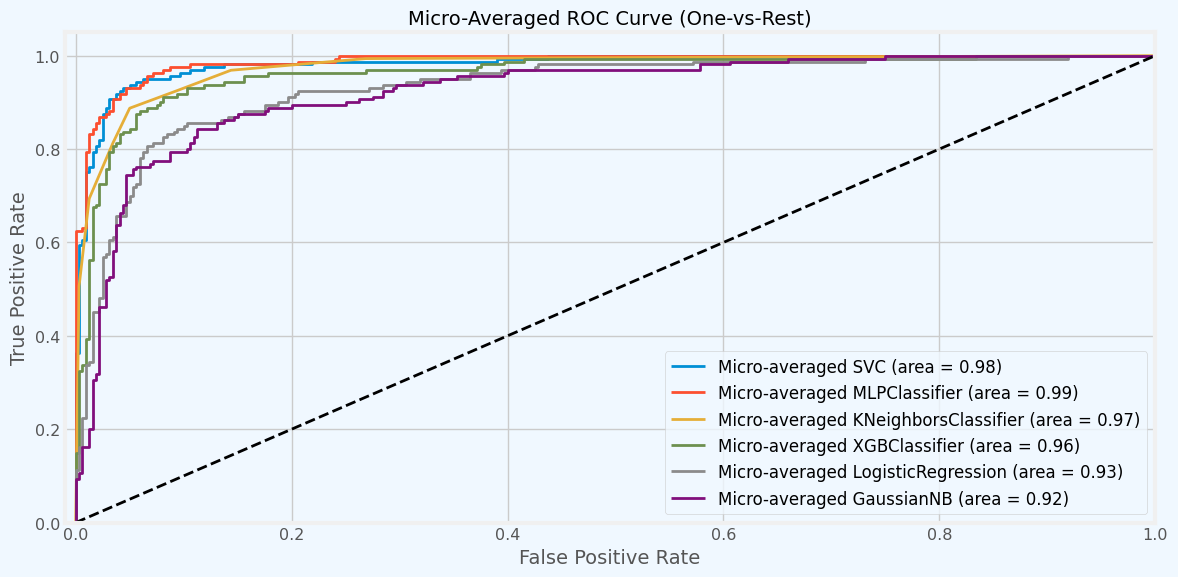

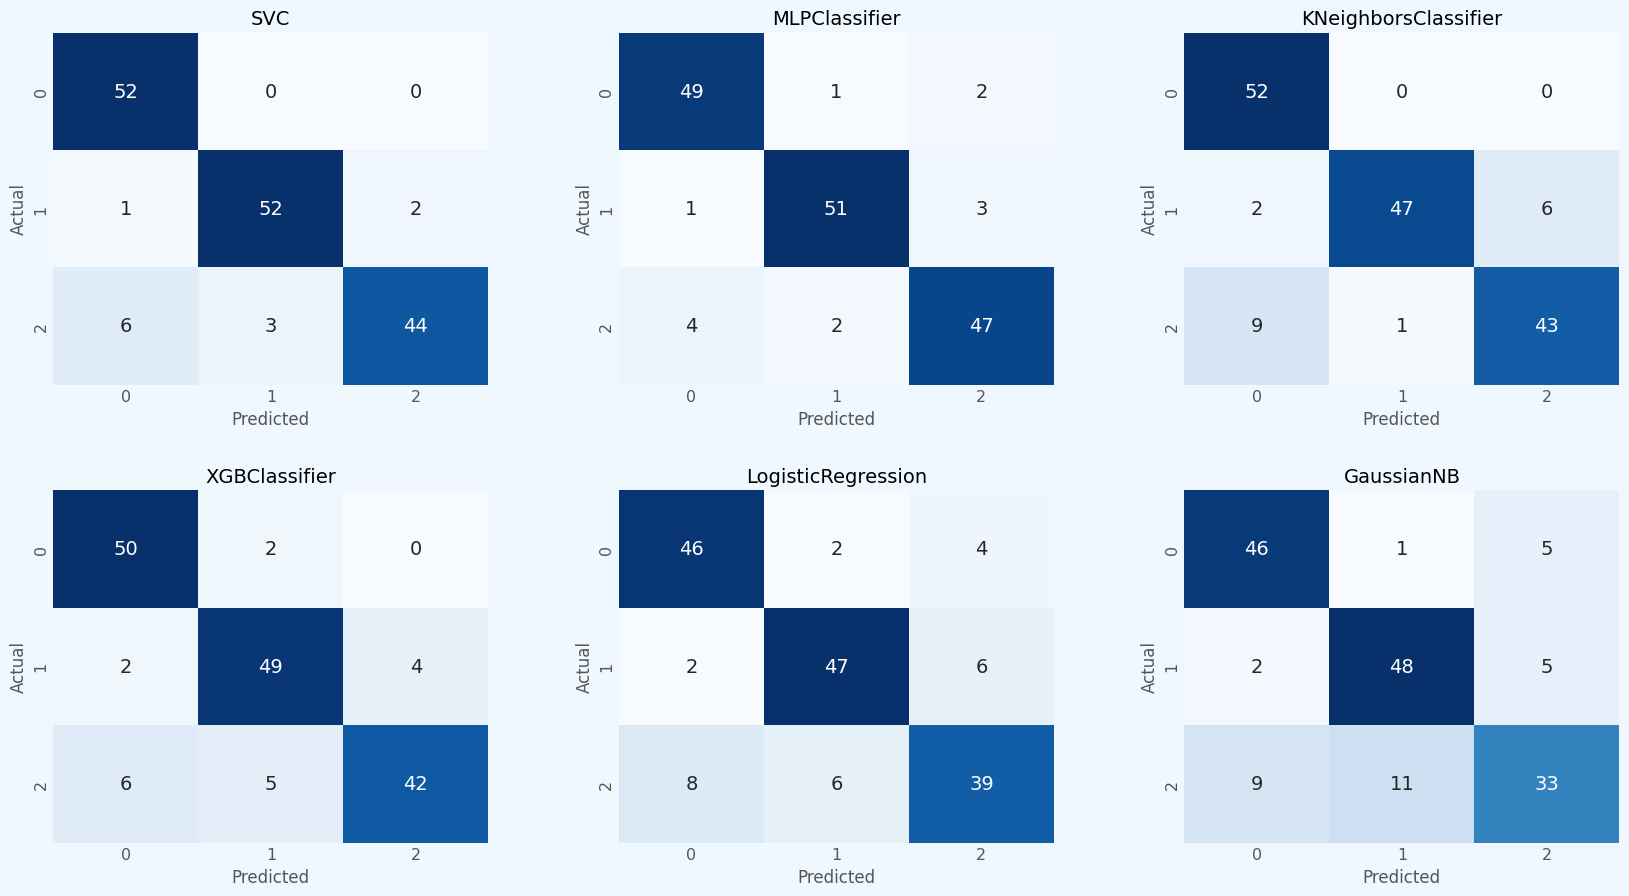

<Figure size 600x500 with 0 Axes>

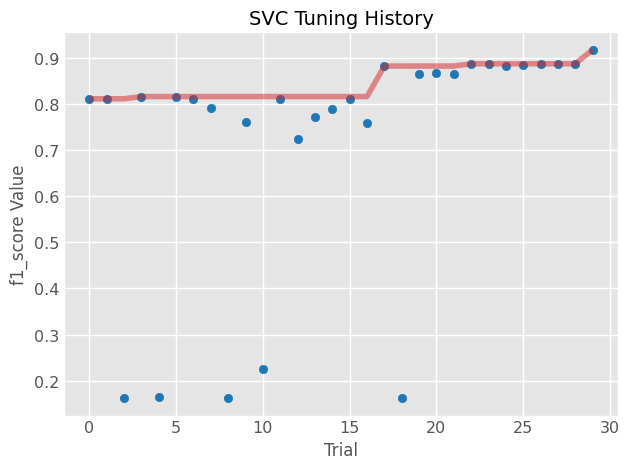

<Figure size 600x500 with 0 Axes>

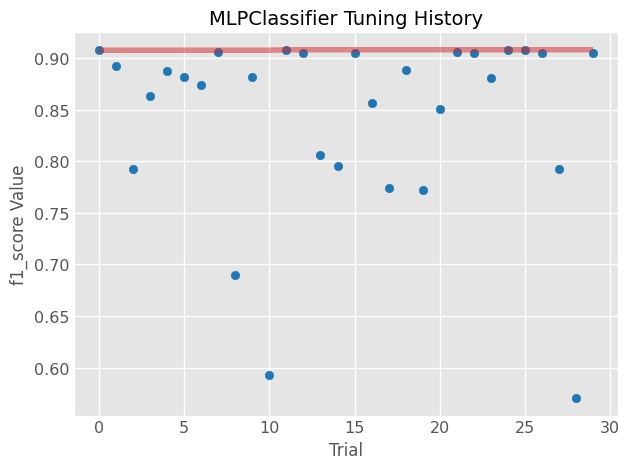

<Figure size 600x500 with 0 Axes>

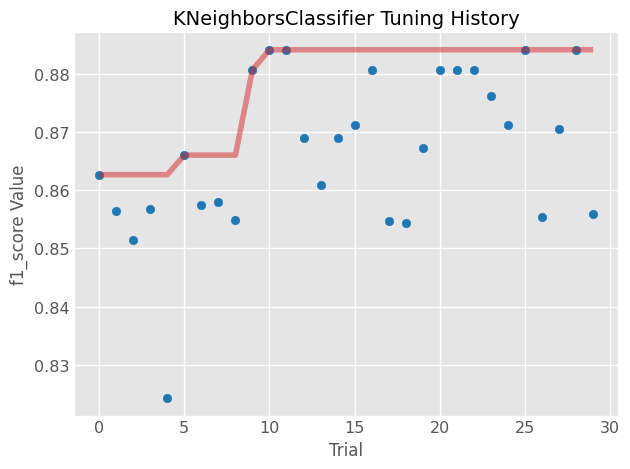

<Figure size 600x500 with 0 Axes>

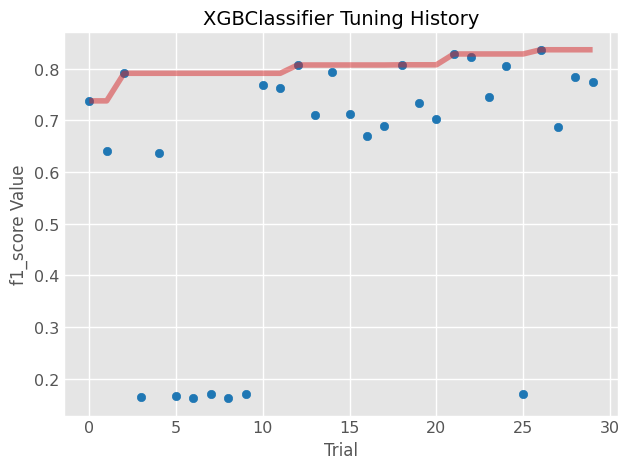

<Figure size 600x500 with 0 Axes>

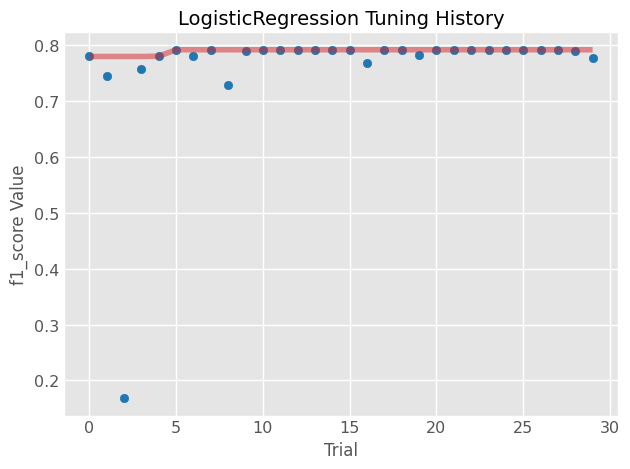

<Figure size 600x500 with 0 Axes>

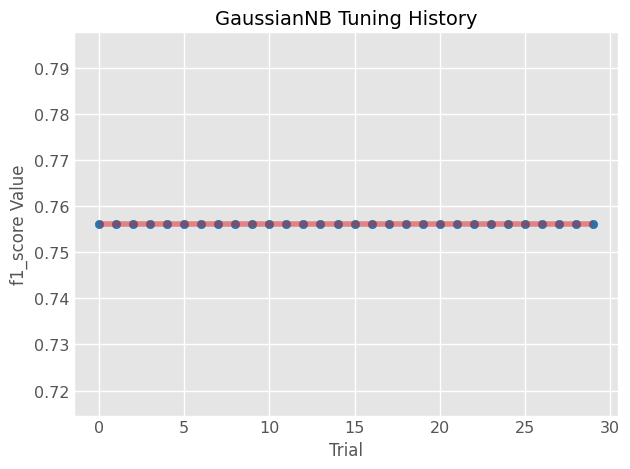

In [14]:
mamut.evaluate(n_top_models=6)

Last but not least, every hyperparameter tuning study from Optuna is saved and can be accessed with the optuna_studies_ attribute. This returns a dictionary of Optuna studies for all fitted models, where the model name is the key. It can be useful for further analysis of hyperparameter tuning using methods available in the Optuna library.

In [15]:
from optuna.visualization import plot_param_importances
study = mamut.optuna_studies_['SVC']
plot_param_importances(study)

### Customizing Mamut Initialization

In this section, we will explore all the parameters that can be passed to the `Mamut` initialization. Understanding these parameters will allow one to customize the process to suit specific needs. By configuring these options, you one is able to control various aspects of data preprocessing, model fitting, hyperparameter tuning, and evaluation.This flexibility ensures that Mamut's capabilities can be fully utilized, tailoring it to unique machine learning workflow and achieving the best possible results.

- `preprocess (default: True)`: Whether to preprocess the data before fitting the models.
- `imb_threshold (default: 0.10)`: The threshold for considering a dataset as imbalanced.
- `exclude_models (default: None)`: A list of model names to exclude from the fitting process.
- `score_metric (default: "f1")`: The metric to use for evaluating model performance. Possible values: `"accuracy"`, `"precision"`, `"recall"`, `"f1"`, `"balanced_accuracy"`, `"jaccard"`, `"roc_auc"`.
- `optimization_method (default: "bayes")`: The method to use for hyperparameter optimization. Possible values: `"random_search"`, `"bayes"`.
- `n_iterations (default: 30)`: The number of iterations to run for hyperparameter optimization.
- `random_state (default: 42)`: The random seed for reproducibility.
- `numeric_features (default: None)`: A list of numeric feature names.
- `categorical_features (default: None)`: A list of categorical feature names.
- `num_imputation (default: "knn")`: The method to use for imputing missing numeric values. Possible values: `"iterative"`, `"knn"`, `"mean"`, `"median"`, `"constant"`.
- `cat_imputation (default: "most_frequent")`: The method to use for imputing missing categorical values. Possible values: `"most_frequent"`, `"constant"`.
- `scaling (default: "standard")`: The method to use for scaling numeric features. Possible values: `"standard"`, `"robust"`.
- `feature_selection (default: False)`: Whether to perform feature selection.
- `pca (default: False)`: Whether to perform Principal Component Analysis (PCA) for dimensionality reduction.
- `imbalanced_resampling (default: True)`: Whether to perform resampling to address class imbalance.
- `resampling_strategy (default: "SMOTE")`: The strategy to use for resampling imbalanced datasets. Possible values: `"SMOTE"`, `"undersample"`, `"combine"`.
- `skew_threshold (default: 1)`: The threshold for considering a feature as skewed.
- `pca_threshold (default: 0.96)`: The variance threshold for PCA.
- `selection_threshold (default: 0.05)`: The threshold for feature selection.
- `imbalance_threshold (default: 0.10)`: The threshold for considering a dataset as imbalanced.

In addition to the initialization parameters, the Mamut library provides several methods that are essential for its functionality. Below are its main functionalities and their parameters, allowing for effective usage:

- `fit(X: pd.DataFrame, y: pd.Series)`: Fits the model to the data.
  - `X`: The input features as a pandas DataFrame.
  - `y`: The target variable as a pandas Series.
  - **Returns**: The best model pipeline, including preprocessing, model fitting, and hyperparameter tuning.

- `predict(X: pd.DataFrame)`: Predicts the target variable for the given data.
  - `X`: The input features as a pandas DataFrame.
  - **Returns**: The predicted target variable as a numpy array.

- `predict_proba(X: pd.DataFrame)`: Predicts the probabilities of the target variable for the given data.
  - `X`: The input features as a pandas DataFrame.
  - **Returns**: The predicted probabilities of the target variable as a numpy array.

- `evaluate(n_top_models: int = 3)`: Evaluates the fitted models.
  - `n_top_models`: The number of top models to include in the evaluation.
  - **Functionality**: Plots several visualizations of fitted models and their performance.

- `save_best_model(path: str)`: Saves the best model to the specified path.
  - `path`: The file path where the model should be saved.

- `create_ensemble(voting: Literal["soft", "hard"] = "soft")`: Creates an ensemble of the fitted models.
  - `voting`: Voting strategy for the ensemble. Possible values: `"soft"`, `"hard"`.
  - **Returns**: The ensemble model pipeline.

Combination of pearameters and methods allow one to fit models, predict outcomes, evaluate performance, create ensembles, and save/load models, providing a comprehensive toolkit for your machine learning tasks.